In [1]:
#Names:  Yuri Müller Plumm (CBPF)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Monte Carlo Simulation
df_ee = pd.read_hdf('z0_mc_ee.h5')
df_mm = pd.read_hdf('z0_mc_mm.h5')
df_tt = pd.read_hdf('z0_mc_tt.h5')
df_qq = pd.read_hdf('z0_mc_qq.h5')

#Data
df_data1 = pd.read_hdf('z0_data1.h5')
df_data2 = pd.read_hdf('z0_data2.h5')
df_data3 = pd.read_hdf('z0_data3.h5')
df_data4 = pd.read_hdf('z0_data4.h5')
df_data5 = pd.read_hdf('z0_data5.h5')
df_data6 = pd.read_hdf('z0_data6.h5')
df_data7 = pd.read_hdf('z0_data7.h5')

#Defining each channel, using the monte carlo of each channel
lista_0 = [0 for i in range(100000)]
class_ee = pd.DataFrame({'class':lista_0})
lista_1 = [1 for i in range(100000)]
class_mm = pd.DataFrame({'class':lista_1})
lista_2 = [2 for i in range(100000)]
class_tt = pd.DataFrame({'class':lista_2})
lista_3 = [3 for i in range(100000)]
class_qq = pd.DataFrame({'class':lista_3})

df_ee_final = df_ee.join(class_ee)
df_mm_final = df_mm.join(class_mm)
df_tt_final = df_tt.join(class_tt)
df_qq_final = df_qq.join(class_qq)

#Taking off some non-prhisical feature of the data that can confuse the NN
result1 = pd.concat([df_ee_final,df_mm_final,df_tt_final,df_qq_final])
result0 = result1.drop(['run','event','e_lep'],axis=1)
#result.head()

df_data1_neww = df_data1.drop(['run','event','e_lep'],axis=1)
df_data2_neww = df_data2.drop(['run','event','e_lep'],axis=1)
df_data3_neww = df_data3.drop(['run','event','e_lep'],axis=1)
df_data4_neww = df_data4.drop(['run','event','e_lep'],axis=1)
df_data5_neww = df_data5.drop(['run','event','e_lep'],axis=1)
df_data6_neww = df_data6.drop(['run','event','e_lep'],axis=1)
df_data7_neww = df_data7.drop(['run','event','e_lep'],axis=1)

In [13]:
CATEGORIES = ['Electron','Muon','Tau','Quark']

In [3]:
result0.head()

,acol,cos_thrust,cos_thrust_neg,cos_thrust_pos,d0_mean,e_ecal,e_hcal,n_charged,n_ecal,n_muons,p_charged,phi_thrust,thrust,z0_mean,class
0,0.478470,-0.857441,-0.860064,0.855789,0.012637,88.929619,0.00,2,2,0,81.328445,-118.945854,0.999992,-0.114538,0
1,0.073654,-0.360697,-0.361289,0.360372,0.026090,90.303406,0.00,2,2,0,71.335449,74.006271,1.000000,-0.052427,0
2,0.383408,-0.971304,-0.970553,0.971979,0.000000,89.632736,3.19,0,2,0,0.000000,-100.534874,0.999994,0.000000,0
3,8.977844,0.420864,0.468641,-0.395415,0.023564,90.568001,0.00,2,3,0,62.687538,35.988522,0.963187,0.694042,0
4,0.137634,-0.968132,-0.968279,0.967988,0.000000,84.347679,2.10,0,2,0,0.000000,-155.903839,0.999999,0.000000,0


In [4]:
result = result0.sample(frac=1).reset_index(drop=True)  #shuffle the rows only
#Xclass = result.drop('class',axis=0)
#yclass = result['class']


In [5]:
Xclass = result.drop('class',axis=1)
yclass = result['class']

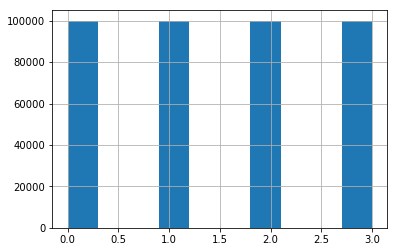

In [6]:
yclass.hist()
plt.show()

In [7]:
X_array = np.array(Xclass)
y_array = np.array(yclass)

In [8]:
N = len(y_array)#total number of simulations
N

400000

In [9]:
training_data = []

def creating_training_data():
    for i in range(int(N)):  # do dogs and cats
        try:
            event = X_array[i]  # convert to array
            tipo = y_array[i]
            training_data.append([event,tipo])
        except Exception as e:   #I should put some warning here
                pass

creating_training_data()

In [10]:
import random

#random.shuffle(training_data)


In [11]:
training_data[0]

[array([ 1.14367676e+00,  9.29805219e-01,  9.29267645e-01, -9.30635810e-01,
         1.09610632e-02,  9.37013702e+01,  0.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  0.00000000e+00,  8.81172657e+00,  7.22930527e+01,
         9.99872506e-01,  1.82751548e+00]), 0]

In [12]:
X = []
y = []

for imgs,types in training_data:
    
    y.append(types)
    X.append(imgs)

print(np.size(y))

400000


In [13]:
import pickle

pickle_out = open("XLEP.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yLEP.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Data saved. Now we could construct our NN

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential  # for a sequential model 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
#import os
#import cv2
#from tqdm import tqdm
#import pandas as pd

import pickle

pickle_in = open("XLEP.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yLEP.pickle","rb")
y = pickle.load(pickle_in)

X = np.array(X) #normalizing data

y = np.array(y)

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = 10
X_test = np.array([X[i] for i in range((len(X)//df))])
X_train = np.array([X[i] for i in range((len(X)//df),len(X))])

y_test = np.array([y[i] for i in range((len(y)//df))])
y_train = np.array([y[i] for i in range((len(y)//df),len(y))])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_test[0],len(X_test[0])

(array([ 0.11813302,  0.10480576,  0.13712253,  0.12398653, -0.50759472,
         1.54449392, -0.85267234, -0.42099135, -0.5089397 , -0.61721897,
        -0.02966687, -0.0358371 ,  0.096172  ,  0.72876074]), 14)

In [18]:
import time

from tensorflow.keras.callbacks import TensorBoard

# Refazer a análise abaixo com os dados tratados corretamente:

In [19]:
dense_layers = [1,9,27]
layer_sizes = [32,64,128]
conv_layers = [0.1,0.3,0.5]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "LEP{}-dr-{}-l-{}-de-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()
            model.add(Dense(layer_size,input_shape = (14,)))
            model.add(Activation('relu'))
            model.add(Dropout(conv_layer))                                       # dropout 10% of the neurons
#           model.add(MaxPooling2D(pool_size=(2, 2)))

#           model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(conv_layer))# dropout 10% of the neurons
            
            model.add(Dense(4))
            model.add(Activation('softmax'))
            
            tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME))

##qual otimizador?
            model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            model.fit(X_train, y_train,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])



LEP0.1-dr-32-l-1-de-1537062896
Train on 251999 samples, validate on 108001 samples
Epoch 1/10
251999/251999 [==============================] - 10s 41us/step - loss: 0.1270 - acc: 0.9552 - val_loss: 0.0601 - val_acc: 0.9781
Epoch 2/10
251999/251999 [==============================] - 10s 39us/step - loss: 0.0639 - acc: 0.9770 - val_loss: 0.0540 - val_acc: 0.9807
Epoch 3/10
251999/251999 [==============================] - 10s 39us/step - loss: 0.0546 - acc: 0.9798 - val_loss: 0.0498 - val_acc: 0.9801
Epoch 4/10
251999/251999 [==============================] - 10s 40us/step - loss: 0.0503 - acc: 0.9815 - val_loss: 0.0428 - val_acc: 0.9832
Epoch 5/10
251999/251999 [==============================] - 10s 41us/step - loss: 0.0472 - acc: 0.9825 - val_loss: 0.0415 - val_acc: 0.9842
Epoch 6/10
251999/251999 [==============================] - 10s 40us/step - loss: 0.0460 - acc: 0.9828 - val_loss: 0.0433 - val_acc: 0.9835
Epoch 7/10
251999/251999 [==============================] - 10s 39us/step - l

Epoch 6/10
251999/251999 [==============================] - 13s 53us/step - loss: 0.0663 - acc: 0.9771 - val_loss: 0.0477 - val_acc: 0.9823
Epoch 7/10
251999/251999 [==============================] - 16s 63us/step - loss: 0.0642 - acc: 0.9776 - val_loss: 0.0458 - val_acc: 0.9830
Epoch 8/10
251999/251999 [==============================] - 18s 72us/step - loss: 0.0631 - acc: 0.9782 - val_loss: 0.0466 - val_acc: 0.9823
Epoch 9/10
251999/251999 [==============================] - 17s 68us/step - loss: 0.0617 - acc: 0.9785 - val_loss: 0.0468 - val_acc: 0.9829
Epoch 10/10
251999/251999 [==============================] - 15s 61us/step - loss: 0.0627 - acc: 0.9781 - val_loss: 0.0445 - val_acc: 0.9838
LEP0.1-dr-128-l-1-de-1537063651
Train on 251999 samples, validate on 108001 samples
Epoch 1/10
251999/251999 [==============================] - 17s 68us/step - loss: 0.0889 - acc: 0.9684 - val_loss: 0.0518 - val_acc: 0.9809
Epoch 2/10
251999/251999 [==============================] - 16s 65us/step -

Epoch 1/10
251999/251999 [==============================] - 28s 111us/step - loss: 0.6712 - acc: 0.6955 - val_loss: 0.7809 - val_acc: 0.5075
Epoch 2/10
251999/251999 [==============================] - 26s 105us/step - loss: 0.3957 - acc: 0.8532 - val_loss: 0.9741 - val_acc: 0.5132
Epoch 3/10
251999/251999 [==============================] - 27s 108us/step - loss: 0.3573 - acc: 0.8798 - val_loss: 0.9445 - val_acc: 0.5070
Epoch 4/10
251999/251999 [==============================] - 26s 105us/step - loss: 0.3392 - acc: 0.8923 - val_loss: 1.2218 - val_acc: 0.5027
Epoch 5/10
251999/251999 [==============================] - 26s 105us/step - loss: 0.3212 - acc: 0.9038 - val_loss: 0.9491 - val_acc: 0.5063
Epoch 6/10
251999/251999 [==============================] - 27s 108us/step - loss: 0.3043 - acc: 0.9142 - val_loss: 1.2765 - val_acc: 0.4604
Epoch 7/10
251999/251999 [==============================] - 27s 108us/step - loss: 0.2953 - acc: 0.9209 - val_loss: 1.4881 - val_acc: 0.4935
Epoch 8/10
25

Train on 251999 samples, validate on 108001 samples
Epoch 1/10
251999/251999 [==============================] - 88s 349us/step - loss: 0.6464 - acc: 0.6563 - val_loss: 0.8611 - val_acc: 0.6196
Epoch 2/10
251999/251999 [==============================] - 95s 376us/step - loss: 0.5401 - acc: 0.7067 - val_loss: 0.6295 - val_acc: 0.6882
Epoch 3/10
251999/251999 [==============================] - 93s 370us/step - loss: 0.5058 - acc: 0.7156 - val_loss: 0.5999 - val_acc: 0.7042
Epoch 4/10
251999/251999 [==============================] - 88s 348us/step - loss: 0.5028 - acc: 0.7159 - val_loss: 0.6478 - val_acc: 0.7033
Epoch 5/10
251999/251999 [==============================] - 82s 325us/step - loss: 0.5109 - acc: 0.7123 - val_loss: 0.5480 - val_acc: 0.7128
Epoch 6/10
251999/251999 [==============================] - 90s 358us/step - loss: 0.5013 - acc: 0.7163 - val_loss: 1.2329 - val_acc: 0.5085
Epoch 7/10
251999/251999 [==============================] - 97s 384us/step - loss: 0.5131 - acc: 0.710

# De acordo com os graficos de val_loss, val_acc, escolhemos o seguintes modelos:
## LEP0.1-dr-128-l-1-de-1537063651
## LEP0.1-dr-64-l-1-de-1537063247
## LEP0.3-dr-128-l-1-de-1537063827

In [31]:
dense_layer = 1
layer_size = 128
drop_layer = 0.1


NAME1 = "fst-LEP-{}-dr-{}-l-{}-de".format(drop_layer, layer_size, dense_layer)
print(NAME1)
tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME1))

model = Sequential()
model.add(Dense(layer_size,input_shape = (int(14),)))
model.add(Activation('relu'))
model.add(Dropout(drop_layer))                                       # dropout 10% of the neurons
#           model.add(MaxPooling2D(pool_size=(2, 2)))

#           model.add(Flatten())
for l in range(dense_layer):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_layer))# dropout 10% of the neurons

model.add(Dense(4))
model.add(Activation('softmax'))

#tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME_final))

#qual otimizador?
model.compile(loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

LEP_model = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          validation_split=0.3,
          callbacks=[tensorboard])

fst-LEP-0.1-dr-128-l-1-de
Train on 251999 samples, validate on 108001 samples
Epoch 1/30
251999/251999 [==============================] - 76s 303us/step - loss: 0.0868 - acc: 0.9695 - val_loss: 0.0520 - val_acc: 0.9808
Epoch 2/30
251999/251999 [==============================] - 68s 269us/step - loss: 0.0515 - acc: 0.9807 - val_loss: 0.0468 - val_acc: 0.9826
Epoch 3/30
251999/251999 [==============================] - 63s 248us/step - loss: 0.0453 - acc: 0.9829 - val_loss: 0.0415 - val_acc: 0.9844
Epoch 4/30
251999/251999 [==============================] - 72s 284us/step - loss: 0.0429 - acc: 0.9839 - val_loss: 0.0393 - val_acc: 0.9857
Epoch 5/30
251999/251999 [==============================] - 60s 236us/step - loss: 0.0413 - acc: 0.9843 - val_loss: 0.0397 - val_acc: 0.9848
Epoch 6/30
251999/251999 [==============================] - 63s 250us/step - loss: 0.0400 - acc: 0.9850 - val_loss: 0.0389 - val_acc: 0.9846
Epoch 7/30
251999/251999 [==============================] - 60s 237us/step -

In [32]:
score = model.evaluate(X_test,y_test)
print("Loss:", score[0])
print("Accuracy:", score[1])

40000/40000 [==============================] - 5s 131us/step
Loss: 0.03463609146872768
Accuracy: 0.9864


In [33]:
nomemodelo = str(NAME1)+'.model'
nomemodelo

'fst-LEP-0.1-dr-128-l-1-de.model'

In [34]:
model.save('fst-LEP-0.1-dr-128-l-1-de.model')

In [8]:
LEP_new_model = tf.keras.models.load_model('fst-LEP-0.1-dr-128-l-1-de.model') #loading the model

predictions = LEP_new_model.predict([X_test]) #testing the model 


In [15]:
import random

itt= random.randint(0,len(y_test))
itt

714

In [16]:
print('Event:', CATEGORIES[y_test[itt]])

Event: Muon


In [17]:

print('Prediction:',CATEGORIES[np.argmax((predictions[itt]))])

Prediction: Muon


In [18]:
import pandas as pd
df = pd.DataFrame({'y_test': y_test})
#df['y_pred'] = np.array(predictions)

#creating a array with the predictions
y_pred = [np.argmax(predictions[i]) for i in range(len(y_test))]
y_prob = [predictions[i][np.argmax(predictions[i])] for i in range(len(y_test))]


pd_y_test = pd.DataFrame({'y_test':y_test})
pd_y_prob = pd.DataFrame({'y_prob':y_prob})
pd_y_pred = pd.DataFrame({'y_pred':y_pred})

df_final = pd.concat([pd_y_pred, pd_y_test,pd_y_prob], axis=1)

#df_final.head(10)





#evaluating the completeness
#df_finalsh = df_final.sample(frac=1).reset_index(drop=True)  #shuffle the rows only

df_final_0 = df_final[df_final['y_test'] == 0]
df_final_1 = df_final[df_final['y_test'] == 1]
df_final_2 = df_final[df_final['y_test'] == 2]
df_final_3 = df_final[df_final['y_test'] == 3]

n0 = df_final_0[df_final_0.y_pred == 0]    # correct predictions for class-0 / threshold=0
n1 = df_final_1[df_final_1.y_pred == 1]    # correct predictions for class-1 / threshold=0
n2 = df_final_2[df_final_2.y_pred == 2]    # correct predictions for class-2 / threshold=0
n3 = df_final_3[df_final_3.y_pred == 3]


n_0 = n0.count()                           #number of correct predictions for class-0 / threshold=0
n_1 = n1.count()                           #number of correct predictions for class-1 / threshold=0
n_2 = n2.count()
n_3 = n3.count()
#number of correct predictions for class-0 / threshold=0

count_0 = df_final_0['y_test'].count()     #get the lenght of the sample of class-0,1 and 2
count_1 = df_final_1['y_test'].count()
count_2 = df_final_2['y_test'].count()
count_3 = df_final_3['y_test'].count()

print("Eff for {} :{}" .format(CATEGORIES[0], n_0[0]/count_0))
print("Eff for {} :{}" .format(CATEGORIES[1], n_1[0]/count_1))
print("Eff for {} :{}" .format(CATEGORIES[2], n_2[0]/count_2))
print("Eff for {} :{}" .format(CATEGORIES[3], n_3[0]/count_3))
#print("Efficiency_picnic:",n_1[0]/count_1)
#print("Efficiency_meeting:",n_2[0]/count_2)

Eff for Electron :0.9957639939485627
Eff for Muon :0.9901970591177354
Eff for Tau :0.9637068708362335
Eff for Quark :0.9961120526368259


In [19]:
print("Number of {} :{}" .format(CATEGORIES[0], count_0))
print("Number of {} :{}" .format(CATEGORIES[1], count_1))
print("Number of {} :{}" .format(CATEGORIES[2], count_2))
print("Number of {} :{}" .format(CATEGORIES[3], count_3))

Number of Electron :9915
Number of Muon :9997
Number of Tau :10057
Number of Quark :10031
